In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import jax
import jax.numpy as jnp
import blackjax
from blackjax.ns.utils import finalise
import tqdm 


: 

In [2]:
kappa = 1
mu = 0
dist = scipy.stats.vonmises(kappa, mu)
x = np.linspace(-np.pi, np.pi, 1000)
p = dist.pdf(x)
plt.plot(x, p);

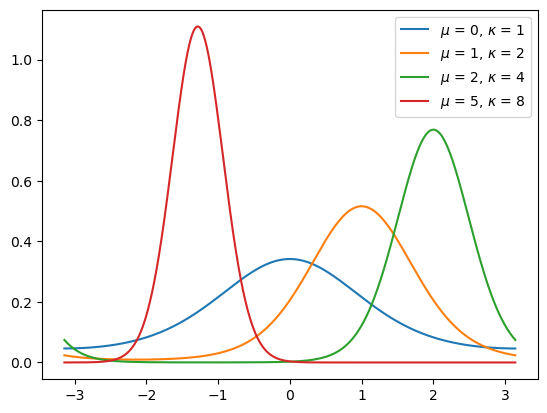

In [20]:
mu_ls = [0,1,2,5]
kappa_ls = [1,2,4,8]

for i in range(len(mu_ls)):
    mu = mu_ls[i]
    kappa = kappa_ls[i]
    dist = scipy.stats.vonmises(kappa, mu)
    x = np.linspace(-np.pi, np.pi, 1000)
    p = dist.pdf(x)
    plt.plot(x, p, label=rf'$\mu$ = {mu}, $\kappa$ = {kappa}')

plt.legend()

### Q 1.1.1: What happens when you set kappa very large?
Very strong peak around mu.

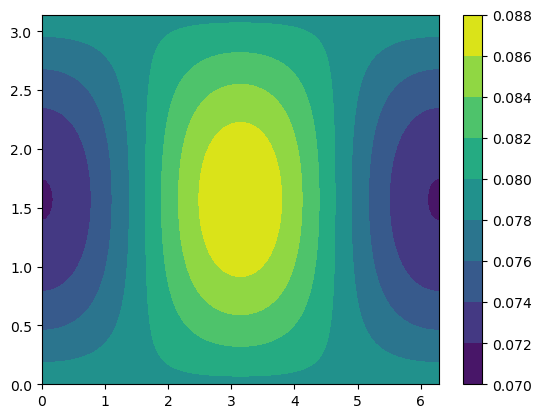

In [31]:
# Define the parameters of von-mises in terms of concentration kappa and mean direction (phi0, theta0)

def vmf_dist(kappa, phi, theta):
    mu = np.array([np.cos(phi)*np.sin(theta),
                   np.sin(phi)*np.sin(theta),
                   np.cos(theta)])
    return scipy.stats.vonmises_fisher(mu, kappa)

kappa = 0.1
phi0 = np.pi
theta0 = np.pi/2
dist = vmf_dist(kappa, phi0, theta0)

# Compute a meshgrid 
phi, theta = np.linspace(0, 2*np.pi, 100), np.arccos(np.linspace(1, -1, 100))
phi, theta = np.meshgrid(phi, theta)
x, y, z  = np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)

# Compute the pdf on the meshgrid with numpy broadcasting
x = np.stack([x, y, z], axis=2)
pdf = dist.pdf(x)
plt.contourf(phi, theta, pdf)
plt.colorbar();



### Exercise 1.2
Kappa changes the strength of the peaks in the distribution. For very large kappa, the peak centered on mu becomes increasingly narrow (smaller dot in mesh grid). For small kappa, the secondary off-mu peaks become more pronounced, and the ratio of the amplitudes of the secondary peaks vs. the central peak increases.

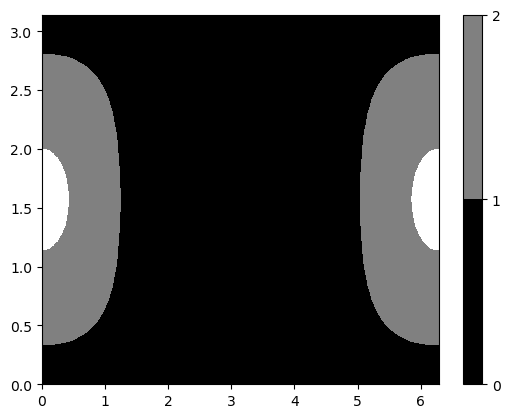

In [33]:
pdf = dist.pdf(x)
pdf = pdf.reshape(-1)
i = np.argsort(pdf)
cdf = pdf[i].cumsum()
cdf /= cdf[-1]
sigma = np.empty_like(pdf)
sigma[i] = np.sqrt(2) * scipy.special.erfinv(1-cdf)
sigma = sigma.reshape(phi.shape)
plt.contourf(phi, theta, sigma, levels=[0, 1, 2], colors=['black', 'gray'])
plt.colorbar();



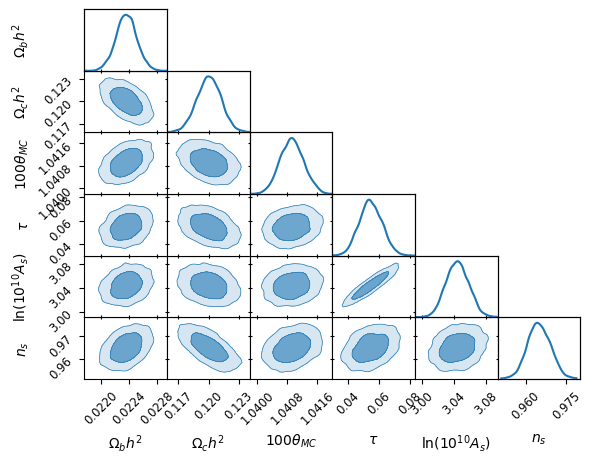

In [37]:
from anesthetic.examples.perfect_ns import planck_gaussian
params = ['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns']
planck_samples = planck_gaussian()[params].compress()
planck_samples.plot_2d(kind='kde');

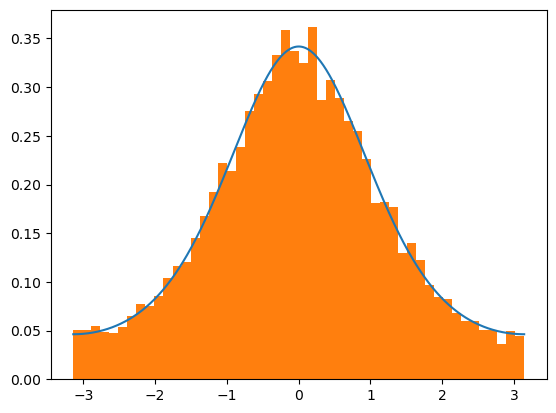

In [42]:
kappa = 1
mu = 0
dist = scipy.stats.vonmises(kappa, mu)
x = np.linspace(-np.pi, np.pi, 1000)
p = dist.pdf(x)
plt.plot(x, p);
samples = dist.rvs(10000)
plt.hist(samples, density=True, bins=50);


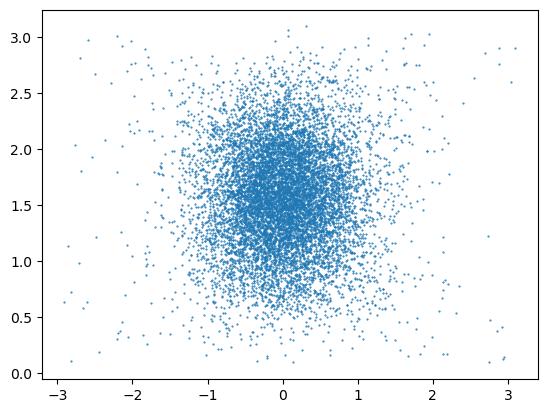

In [43]:
kappa = 4
phi0 = 0
theta0 = np.pi/2
dist = vmf_dist(kappa, phi0, theta0)
N = 10000
samples = dist.rvs(N)
theta, phi = np.arccos(samples[:,2]), np.arctan2(samples[:,1], samples[:,0])
plt.plot(phi, theta, '.', markersize=1);

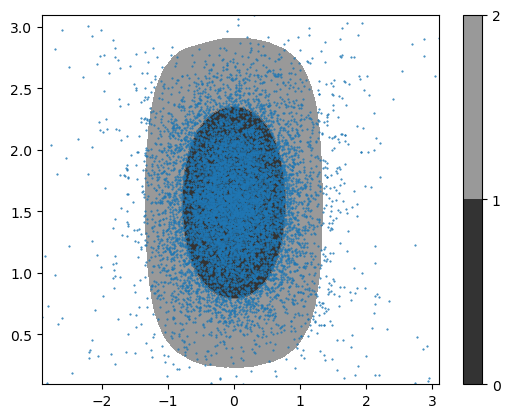

In [44]:
pdf = dist.pdf(samples)
i = np.argsort(pdf)
cdf = np.arange(1,N+1)/(N+1)
sigma = np.empty_like(pdf)
sigma[i] = np.sqrt(2) * scipy.special.erfinv(1-cdf)
plt.tricontourf(phi, theta, sigma, levels=[0, 1, 2], colors=['black', 'gray'], alpha=0.8)
plt.plot(phi, theta, '.', markersize=1)
plt.colorbar();



In [ ]:
pdf = dist.pdf(x)
pdf = pdf.reshape(-1)
i = np.argsort(pdf)
cdf = pdf[i].cumsum()
cdf /= cdf[-1]

sigma[i] = np.sqrt(2) * scipy.special.erfinv(1-cdf)

### Q 2.2.1: Why is the sigma calculation different in comparison to the previous example?

In the previous example, we were using grid points (uniform in prior), now we are using samples (uniform in posterior). Now, samples drawn from the distribution will populate its CDF uniformly.

THINK ABOUT AGAIN

In [45]:
planck_samples

,omegabh2,omegach2,theta,tau,logA,ns
labels,$\Omega_b h^2$,$\Omega_c h^2$,$100\theta_{MC}$,$\tau$,${\rm{ln}}(10^{10} A_s)$,$n_s$
18467,0.022425,0.121778,1.041641,0.071010,3.092600,0.960775
18669,0.022365,0.119682,1.041498,0.075087,3.077855,0.977614
18680,0.021768,0.124036,1.040498,0.052135,3.051215,0.951551
18763,0.022415,0.123707,1.040258,0.057303,3.063066,0.953449
18859,0.022742,0.115871,1.040573,0.071238,3.063935,0.974565
...,...,...,...,...,...,...
28467,0.022343,0.120389,1.040851,0.052231,3.041835,0.964625
28571,0.022334,0.120169,1.040846,0.052212,3.041046,0.965180
28630,0.022373,0.120345,1.040948,0.053330,3.042670,0.963155


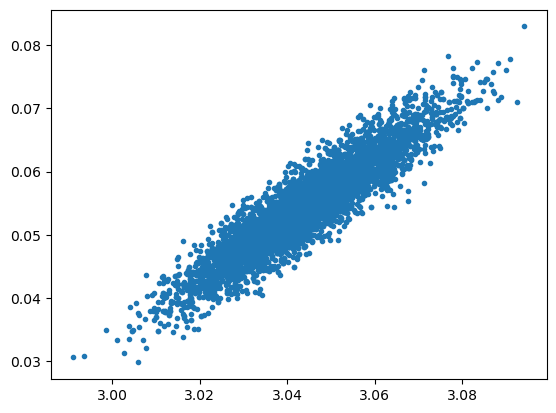

In [46]:
plt.plot(*planck_samples[['logA', 'tau']].to_numpy().T, '.');

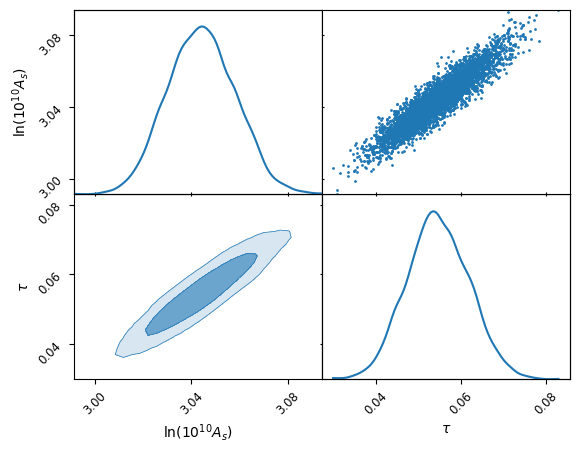

In [47]:
planck_samples[['logA', 'tau']].plot_2d();


### Exercise 2.4

In [55]:
x = np.random.normal(0,1,10000)

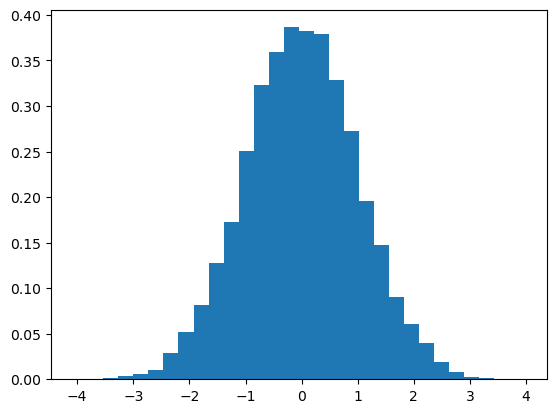

In [59]:
plt.hist(x, bins=30, density=True)
plt.show()

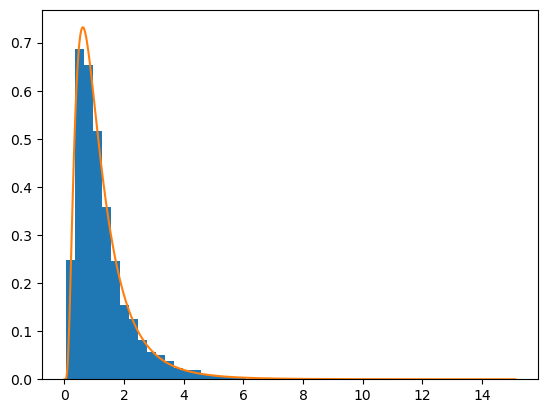

In [65]:
x = scipy.stats.norm().rvs(10000)

def f(x):
    return 2**x

plt.hist(f(x), bins=50, density=True)
x_ = np.linspace(0, f(x).max(), 1000)
s = np.log(2)
plt.plot(x_, scipy.stats.lognorm(s).pdf(x_))

In [67]:
from anesthetic import Samples

x = np.random.rand(100,3)
w = np.random.rand(100)
samples = Samples(x, weights=w)
samples

,,0,1,2
,weights,,,
0,0.282067,0.972917,0.132376,0.920847
1,0.819945,0.396013,0.283810,0.365585
2,0.045262,0.615570,0.661644,0.581234
3,0.952105,0.618241,0.007009,0.532844
4,0.638188,0.612829,0.509868,0.355668
...,...,...,...,...
95,0.068527,0.463511,0.112021,0.808531
96,0.135698,0.488871,0.438514,0.716608
97,0.940186,0.508772,0.281308,0.694790


In [68]:
samples.mean()

0    0.610872
1    0.518073
2    0.554185
dtype: float64

In [69]:
samples.std()

0    0.269818
1    0.302101
2    0.262439
dtype: float64

In [71]:
print(np.mean(x, axis=0) - samples.mean())
print(np.std(x, axis=0) - samples.std())

0   -0.026105
1    0.011053
2   -0.007758
dtype: float64
0    0.016006
1   -0.004479
2    0.007493
dtype: float64


### Q 2.6: What statistical operation can you not easily get from samples?

Evidence? Integral of the likelihood (Data | theta, M) * prior (theta | M) over the *entire* parameter space.

In [73]:
from examples import planck

In [75]:
type(planck.prior)

scipy.stats._distn_infrastructure.rv_continuous_frozen

## Quickstart

In [78]:
import jax
import jax.numpy as jnp
import blackjax
from blackjax.ns.utils import finalise
import tqdm 

rng_key = jax.random.PRNGKey(0)

loglikelihood_fn = lambda x: jax.scipy.stats.multivariate_normal.logpdf(x, jnp.ones(5), jnp.eye(5)*0.01)
logprior_fn = lambda x : jax.scipy.stats.multivariate_normal.logpdf(x, jnp.zeros(5), jnp.eye(5))

algo = blackjax.nss(
    logprior_fn=logprior_fn,
    loglikelihood_fn=loglikelihood_fn,
    num_delete=50,
    num_inner_steps=20,
)

rng_key, sampling_key, initialization_key = jax.random.split(rng_key, 3)
live = algo.init(jax.random.normal(initialization_key, (1000, 5)))
step = jax.jit(algo.step)

dead_points = []

with tqdm.tqdm(desc="Dead points", unit=" dead points") as pbar:
    while (not live.logZ_live - live.logZ < -3):
        rng_key, subkey = jax.random.split(rng_key)
        live, dead = step(subkey, live)
        dead_points.append(dead)
        pbar.update(len(dead.particles))

ns_run = finalise(live, dead_points)

ImportError: cannot import name 'mcmc' from partially initialized module 'blackjax' (most likely due to a circular import) (/Users/camelot/opt/anaconda3/lib/python3.9/site-packages/blackjax/__init__.py)

## Walkthrough

## Best Practices
